#### **Main Problem:** Understanding Customer Churn in a Bank: Identifying Key Factors and Predicting Churn
Understanding customer churn in a bank is critical for maintaining a stable and growing customer base. This project aims to identify the key factors that contribute to customer churn by analyzing demographic, behavioral, and financial data of the bank's customers. By employing various data science techniques, we will explore patterns and trends that differentiate customers who churn from those who do not. Additionally, we will build predictive models to forecast future churn, enabling the bank to implement targeted retention strategies. Ultimately, this analysis seeks to provide actionable insights to reduce churn rates, enhance customer satisfaction, and improve overall business performance.

## Step 1: Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = "BankChurners.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
# Check for missing values
print(data.isnull().sum())

# Display data types
print(data.dtypes)

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

## Step 2: Data Preprocessing

In [3]:
# Display summary statistics
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [4]:
# Since no null / missing values are present, we can proceed with the analysis

# Shape of the dataset
print(data.shape)

# Drop columns not relevant to analysis
data = data.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'])

print(data.shape)

# Count the number of churned and non-churned customers
churn_counts = data['Attrition_Flag'].value_counts()

# Print the counts
print(churn_counts)



(10127, 23)
(10127, 20)
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


## Step 3: Exploratory Data Analysis (EDA)


### **Question 1 (Descriptive):**
#### What are the key demographic and transaction characteristics (age, gender, dependent count, education, average transaction amount, and count) that differentiate customers who churn from those who do not?

This question aims to provide a comprehensive summary of both the basic demographic attributes and transaction behaviors of customers who have left the bank compared to those who have stayed. It will help in understanding if there are any noticeable patterns in demographics and transaction metrics associated with churn. By examining these factors, we can identify key characteristics that may be indicative of a higher likelihood of customer churn.

**Summary Statistics for Churned vs. Non-Churned Customers**

In [5]:
# Separate the churned and non-churned customers
churned_customers = data[data['Attrition_Flag'] == 'Attrited Customer']
non_churned_customers = data[data['Attrition_Flag'] == 'Existing Customer']

# Columns of interest
demographic_columns = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level']

# Summary statistics for churned customers
churned_summary = churned_customers[demographic_columns].describe(include='all')

# Summary statistics for non-churned customers
non_churned_summary = non_churned_customers[demographic_columns].describe(include='all')

# Combine summaries into a single dataframe for easier comparison
summary_table = pd.concat([churned_summary, non_churned_summary], axis=1, keys=['Churned', 'Non-Churned'])

# Display the summary table
summary_table

Churned                                         Non-Churned  \
       Customer_Age Gender Dependent_count Education_Level Customer_Age   
count   1627.000000   1627     1627.000000            1627  8500.000000   
unique          NaN      2             NaN               7          NaN   
top             NaN      F             NaN        Graduate          NaN   
freq            NaN    930             NaN             487          NaN   
mean      46.659496    NaN        2.402581             NaN    46.262118   
std        7.665652    NaN        1.275010             NaN     8.081157   
min       26.000000    NaN        0.000000             NaN    26.000000   
25%       41.000000    NaN        2.000000             NaN    41.000000   
50%       47.000000    NaN        2.000000             NaN    46.000000   
75%       52.000000    NaN        3.000000             NaN    52.000000   
max       68.000000    NaN        5.000000             NaN    73.000000   

                                               
       Gender Dependent_count Education_Level  
count    8500     8500.000000            8500  
unique      2             NaN               7  
top         F             NaN        Graduate  
freq     4428             NaN            2641  
mean      NaN        2.335412             NaN  
std       NaN        1.303229             NaN  
min       NaN        0.000000             NaN  
25%       NaN        1.000000             NaN  
50%       NaN        2.000000             NaN  
75%       NaN        3.000000             NaN  
max       NaN        5.000000             NaN

**Age and Attrition Flag**

In [6]:
age_grouped = data.groupby(['Customer_Age', 'Attrition_Flag']).size().reset_index(name='Count')
age_pivot = age_grouped.pivot(index='Customer_Age', columns='Attrition_Flag', values='Count').fillna(0)
age_pivot

Attrition_Flag,Attrited Customer,Existing Customer
Customer_Age,,
26,6.0,72.0
27,3.0,29.0
28,1.0,28.0
29,7.0,49.0
30,15.0,55.0
31,13.0,78.0
32,17.0,89.0
33,20.0,107.0
34,19.0,127.0


**Gender and Attrition Flag**

In [7]:
gender_grouped = data.groupby(['Gender', 'Attrition_Flag']).size().reset_index(name='Count')
gender_pivot = gender_grouped.pivot(index='Gender', columns='Attrition_Flag', values='Count').fillna(0)
gender_pivot

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


**Dependent Count and Attrition Flag**

In [8]:
dependent_grouped = data.groupby(['Dependent_count', 'Attrition_Flag']).size().reset_index(name='Count')
dependent_pivot = dependent_grouped.pivot(index='Dependent_count', columns='Attrition_Flag', values='Count').fillna(0)
dependent_pivot

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,135,769
1,269,1569
2,417,2238
3,482,2250
4,260,1314
5,64,360


**Education Level and Attrition Flag**

In [9]:
education_grouped = data.groupby(['Education_Level', 'Attrition_Flag']).size().reset_index(name='Count')
education_pivot = education_grouped.pivot(index='Education_Level', columns='Attrition_Flag', values='Count').fillna(0)
education_pivot

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


**Grouped Data by Income Category and Attrition Flag**

In [10]:
# Print the unique values of Income_Category
print(data['Income_Category'].unique())

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [11]:
# Define custom order for Income_Category
income_order = [
    'Less than $40K', 
    '$40K - $60K', 
    '$60K - $80K', 
    '$80K - $120K', 
    '$120K +', 
    'Unknown'
]

# Group by Income_Category and Attrition_Flag
grouped_data = data.groupby(['Income_Category', 'Attrition_Flag']).agg({
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean'
}).reset_index()

# Convert Income_Category to a categorical type with the specified order for sorting
grouped_data['Income_Category'] = pd.Categorical(grouped_data['Income_Category'], categories=income_order, ordered=True)

# Sort the grouped data by Income_Category
grouped_data = grouped_data.sort_values('Income_Category')

# Display the grouped data
grouped_data

,Income_Category,Attrition_Flag,Total_Trans_Amt,Total_Trans_Ct
8,Less than $40K,Attrited Customer,2865.243464,44.196078
9,Less than $40K,Existing Customer,4674.333672,70.711767
2,$40K - $60K,Attrited Customer,2992.726937,44.612546
3,$40K - $60K,Existing Customer,4657.688611,68.637920
4,$60K - $80K,Attrited Customer,3246.380952,44.835979
5,$60K - $80K,Existing Customer,4638.361913,66.116241
6,$80K - $120K,Attrited Customer,3740.615702,47.471074
7,$80K - $120K,Existing Customer,4621.898685,65.546017
0,$120K +,Attrited Customer,3393.071429,45.650794
1,$120K +,Existing Customer,4767.713810,67.489185


**Pivot Data for Easier Comparison**

In [12]:
# Pivot the data for easier comparison
pivot_data = grouped_data.pivot(index='Income_Category', columns='Attrition_Flag', values=['Total_Trans_Amt', 'Total_Trans_Ct'])

# Display the pivoted data
pivot_data

Total_Trans_Amt                      Total_Trans_Ct  \
Attrition_Flag  Attrited Customer Existing Customer Attrited Customer   
Income_Category                                                         
Less than $40K        2865.243464       4674.333672         44.196078   
$40K - $60K           2992.726937       4657.688611         44.612546   
$60K - $80K           3246.380952       4638.361913         44.835979   
$80K - $120K          3740.615702       4621.898685         47.471074   
$120K +               3393.071429       4767.713810         45.650794   
Unknown               2806.026738       4580.640000         44.144385   

                                   
Attrition_Flag  Existing Customer  
Income_Category                    
Less than $40K          70.711767  
$40K - $60K             68.637920  
$60K - $80K             66.116241  
$80K - $120K            65.546017  
$120K +                 67.489185  
Unknown                 70.720000

**Visualizing Demographic Characteristics**

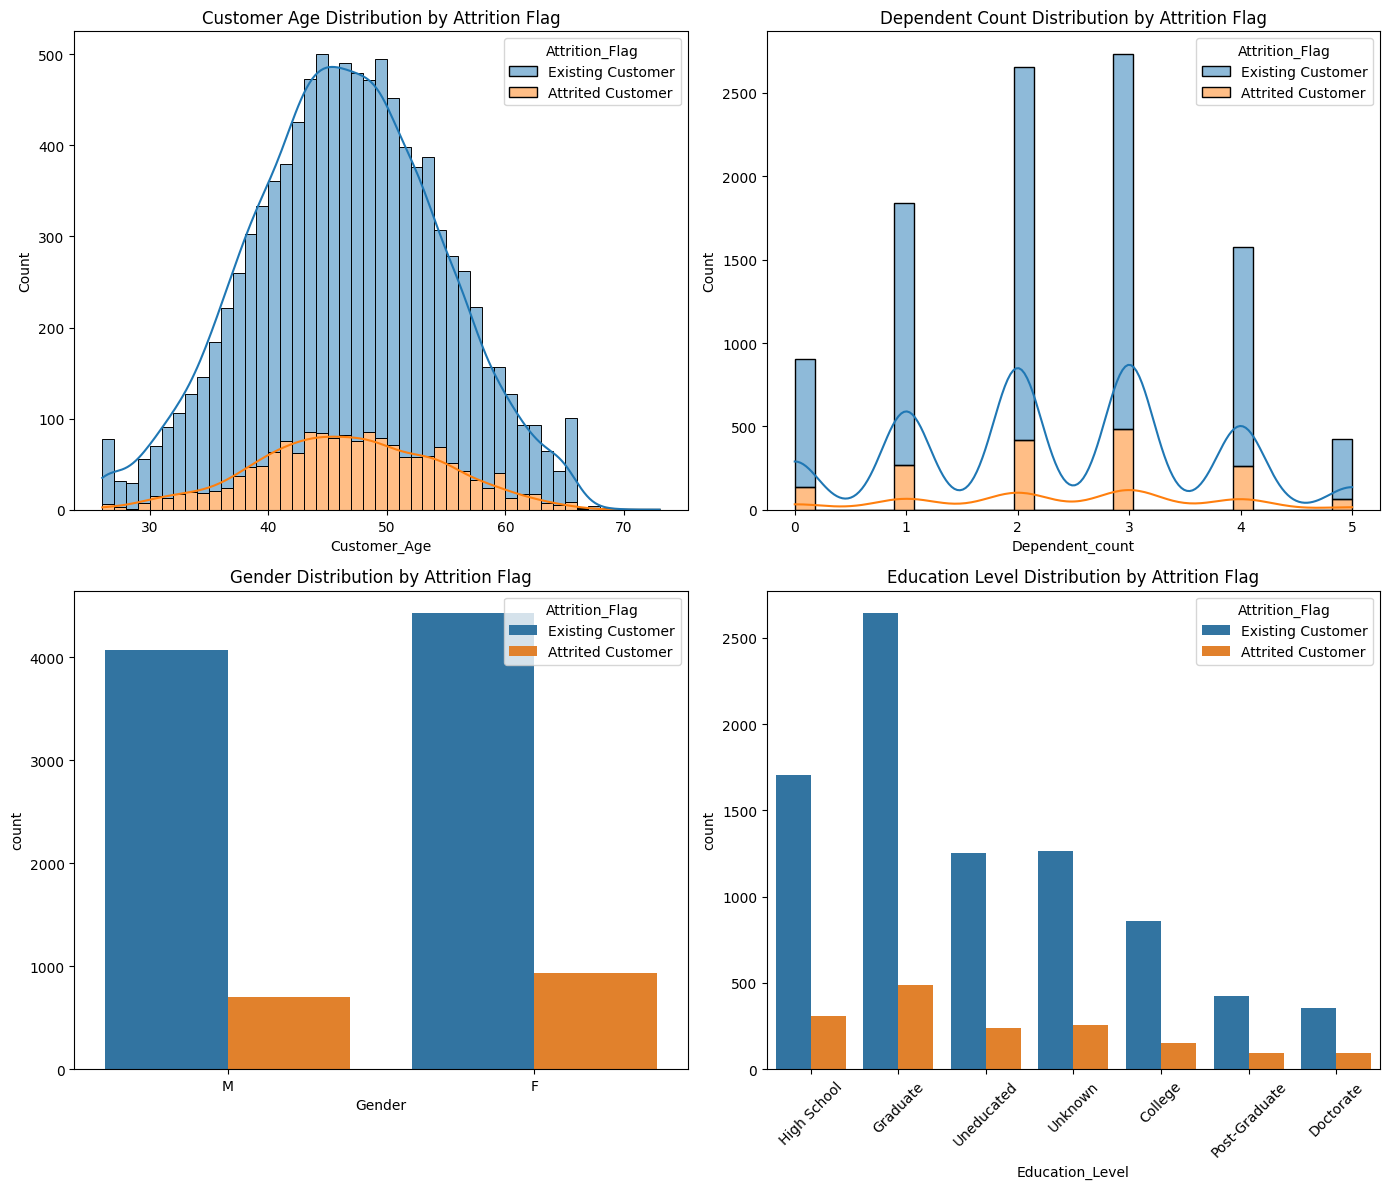

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Customer Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', multiple='stack', kde=True)
plt.title('Customer Age Distribution by Attrition Flag')

# Dependent Count distribution
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Dependent_count', hue='Attrition_Flag', multiple='stack', kde=True)
plt.title('Dependent Count Distribution by Attrition Flag')

# Gender distribution
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Gender', hue='Attrition_Flag')
plt.title('Gender Distribution by Attrition Flag')

# Education Level distribution
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='Education_Level', hue='Attrition_Flag')
plt.xticks(rotation=45)
plt.title('Education Level Distribution by Attrition Flag')

plt.tight_layout()
plt.show()


**Visualizing the Average Transaction Amount and Count by Income Category and Churn Status**

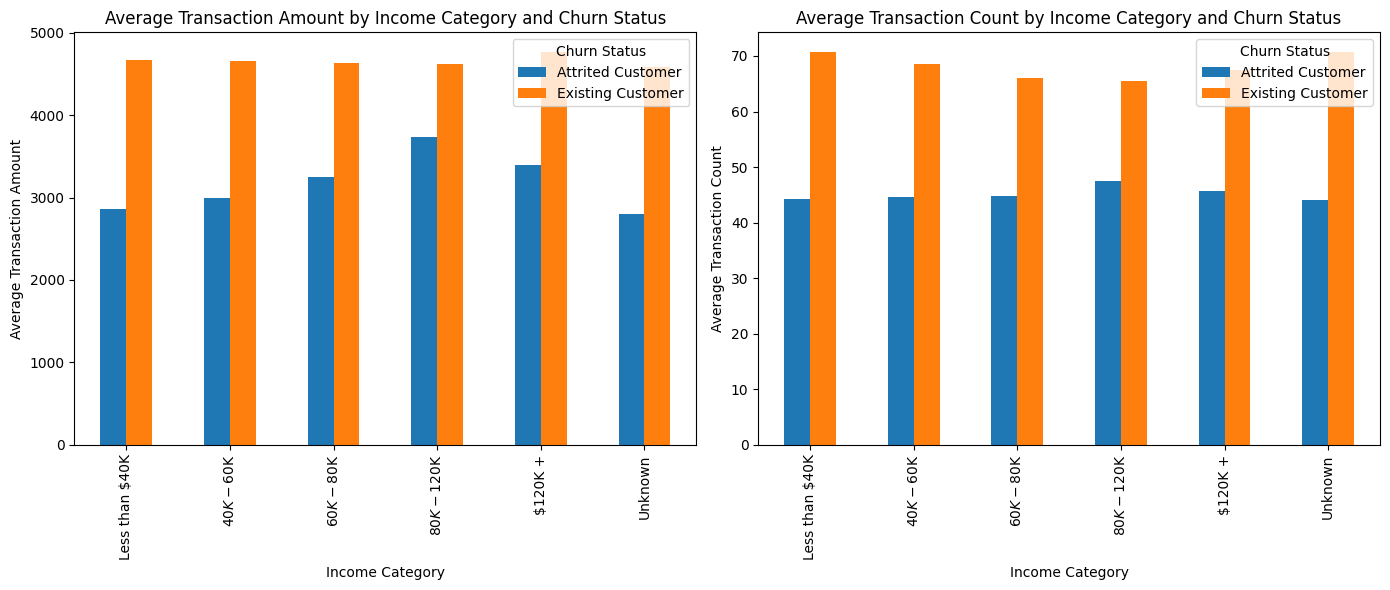

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Average Transaction Amount
plt.subplot(1, 2, 1)
pivot_data['Total_Trans_Amt'].plot(kind='bar', ax=plt.gca())
plt.title('Average Transaction Amount by Income Category and Churn Status')
plt.xlabel('Income Category')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Churn Status')

# Average Transaction Count
plt.subplot(1, 2, 2)
pivot_data['Total_Trans_Ct'].plot(kind='bar', ax=plt.gca())
plt.title('Average Transaction Count by Income Category and Churn Status')
plt.xlabel('Income Category')
plt.ylabel('Average Transaction Count')
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()

### **Question 2 (Exploratory):**
#### Which numerical feature has the strongest correlation with Avg_Open_To_Buy?

This question aims to understand the relationship between the average open-to-buy credit line over the last 12 months (Avg_Open_To_Buy) and other numerical features in the dataset. Specifically, it seeks to identify which feature is most strongly associated with Avg_Open_To_Buy. Understanding this correlation can provide insights into what influences the available credit line, potentially guiding decisions related to credit limit adjustments, risk assessment, and customer financial behavior analysis.

### Exploring the correlation matrix
To identify which numerical feature has the strongest correlation with `Avg_Open_To_Buy`, we will create a correlation matrix and plot a heatmap.


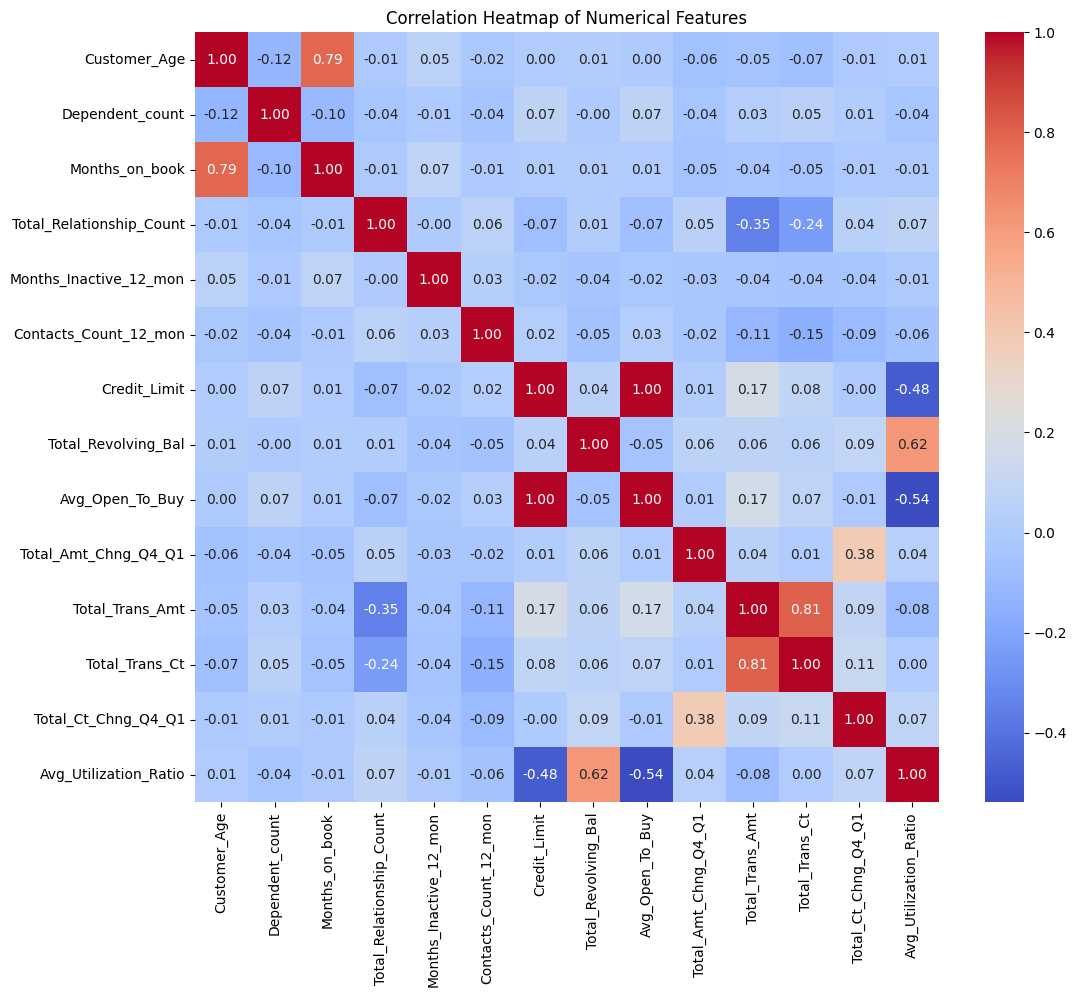

In [15]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Calculate the correlation matrixz
corr_matrix = data[num_cols].corr()


# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### Analyzing the correlation heatmap
From the heatmap, we can observe the correlation coefficients between `Avg_Open_To_Buy` and other numerical features.


In [16]:
# Extract the correlations of 'Avg_Open_To_Buy' with other features
avg_open_to_buy_corr = corr_matrix['Avg_Open_To_Buy']

# Find the feature with the highest correlation with 'Avg_Open_To_Buy'
strongest_corr_feature = avg_open_to_buy_corr.drop('Avg_Open_To_Buy').idxmax()
strongest_corr_value = avg_open_to_buy_corr.drop('Avg_Open_To_Buy').max()

print(f"The numerical feature with the strongest correlation with Avg_Open_To_Buy is '{strongest_corr_feature}' with a correlation coefficient of {strongest_corr_value:.2f}.")


The numerical feature with the strongest correlation with Avg_Open_To_Buy is 'Credit_Limit' with a correlation coefficient of 1.00.


### Answer:
Based on the correlation heatmap and analysis, the numerical feature with the strongest correlation with `Avg_Open_To_Buy` is `Credit_Limit`, which has a correlation coefficient of **1.00**. This means that as the credit limit increases, the average open-to-buy amount tends to increase as well, indicating a positive relationship between these two features.


### **Question 3 (Inferential):**
#### Given that higher credit card usage is hypothesized to be linked with lower churn rates, is this hypothesis true for our dataset?

This question aims to test the hypothesis that higher credit card usage (e.g., more transactions, higher transaction amounts) is associated with lower churn rates. We will use statistical methods to infer if this observed relationship in our dataset is significant.

**Defining Credit Card Usage Metrics and Separating Data**

In [17]:
# Define credit card usage metrics
usage_metrics = ['Total_Trans_Ct', 'Total_Trans_Amt']

# Separate the data into churned and non-churned groups
churned_data = data[data['Attrition_Flag'] == 'Attrited Customer']
non_churned_data = data[data['Attrition_Flag'] == 'Existing Customer']

**Aggregating Usage Metrics by Churn Status**

In [18]:
# Aggregate usage metrics by churn status
usage_summary = data.groupby('Attrition_Flag').agg({
    'Total_Trans_Ct': 'mean',
    'Total_Trans_Amt': 'mean'
})

usage_summary

,Total_Trans_Ct,Total_Trans_Amt
Attrition_Flag,,
Attrited Customer,44.933620,3095.025814
Existing Customer,68.672588,4654.655882


**Statistical Testing of Credit Card Usage Metrics**

In [19]:
from scipy.stats import ttest_ind

# Perform t-tests for each usage metric
ttest_results = {}
for metric in usage_metrics:
    t_stat, p_value = ttest_ind(churned_data[metric], non_churned_data[metric], equal_var=False)
    ttest_results[metric] = {'t_stat': t_stat, 'p_value': p_value}

# Display t-test results with improved print statements
for metric, result in ttest_results.items():
    print(f"Metric: {metric}")
    print(f"t-statistic: {result['t_stat']:.4f}, p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"Result: Reject the null hypothesis - Significant difference found")
        print(f"Customers with higher {metric} are less likely to churn.\n")
    else:
        print(f"Result: Fail to reject the null hypothesis - No significant difference found")
        print(f"There is no significant relationship between {metric} and churn.\n")

Metric: Total_Trans_Ct
t-statistic: -54.1419, p-value: 0.0000
Result: Reject the null hypothesis - Significant difference found
Customers with higher Total_Trans_Ct are less likely to churn.

Metric: Total_Trans_Amt
t-statistic: -22.6859, p-value: 0.0000
Result: Reject the null hypothesis - Significant difference found
Customers with higher Total_Trans_Amt are less likely to churn.



**Visual Analysis**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


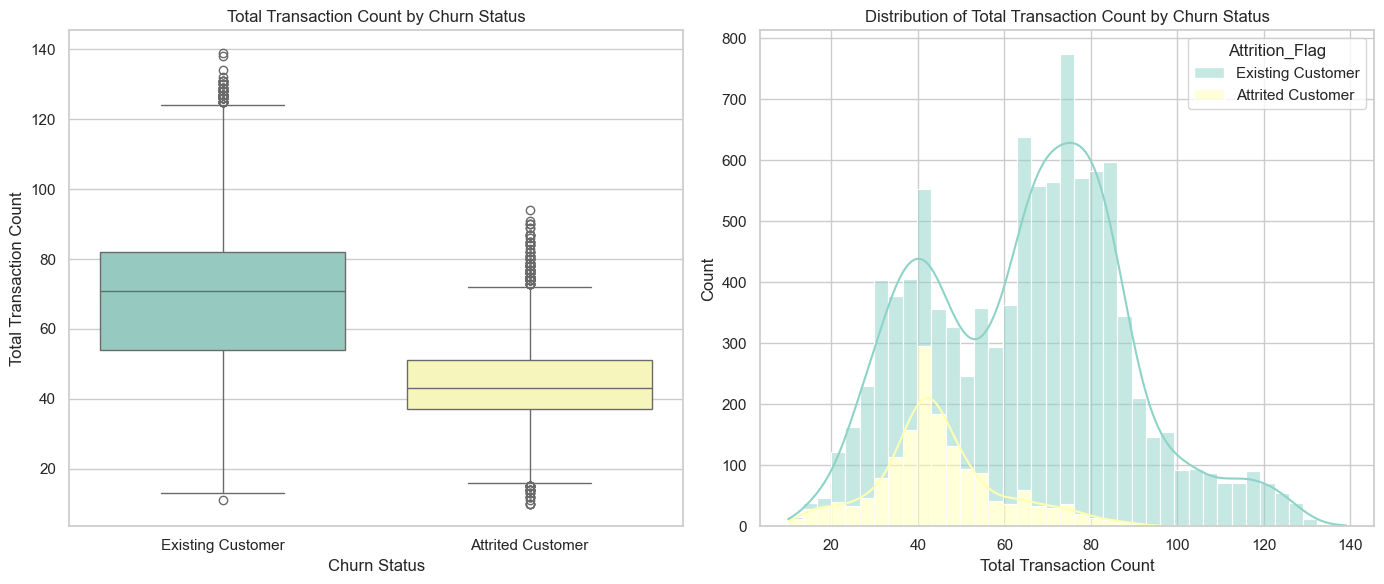

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


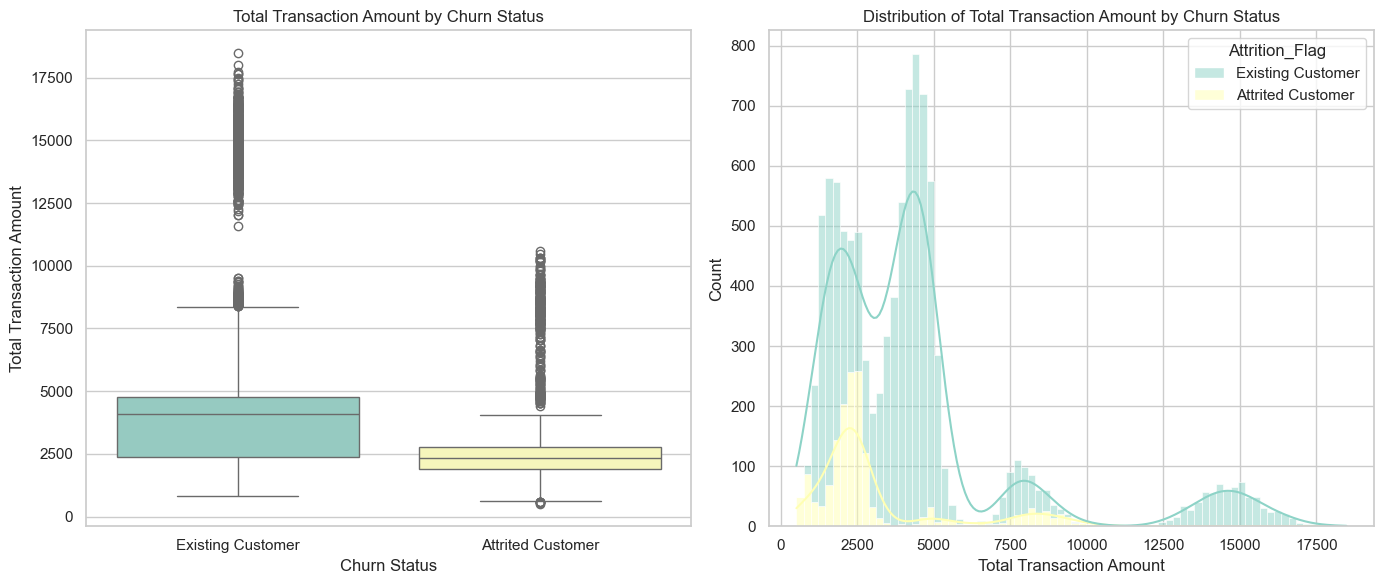

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with two subplots: one for each metric
plt.figure(figsize=(14, 6))

# Total Transaction Count distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=data, palette="Set3", hue='Attrition_Flag', dodge=False)
plt.title('Total Transaction Count by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Transaction Count')
plt.legend().set_visible(False)

# Histogram for Total Transaction Count
plt.subplot(1, 2, 2)
sns.histplot(data, x='Total_Trans_Ct', hue='Attrition_Flag', multiple='stack', kde=True, palette="Set3")
plt.title('Distribution of Total Transaction Count by Churn Status')
plt.xlabel('Total Transaction Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create a figure with two subplots: one for each metric
plt.figure(figsize=(14, 6))

# Total Transaction Amount distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=data, palette="Set3", hue='Attrition_Flag', dodge=False)
plt.title('Total Transaction Amount by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Transaction Amount')
plt.legend().set_visible(False)

# Histogram for Total Transaction Amount
plt.subplot(1, 2, 2)
sns.histplot(data, x='Total_Trans_Amt', hue='Attrition_Flag', multiple='stack', kde=True, palette="Set3")
plt.title('Distribution of Total Transaction Amount by Churn Status')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



### Analysis:

1. **Total Transaction Count (Total_Trans_Ct):**
   - **t-statistic:** -54.1419
   - **p-value:** 0.0000
   - **Interpretation:** The p-value is significantly less than 0.05, indicating a statistically significant difference between churned and non-churned customers. Non-churned customers have a higher total transaction count.

2. **Total Transaction Amount (Total_Trans_Amt):**
   - **t-statistic:** -22.6859
   - **p-value:** 0.0000
   - **Interpretation:** The p-value is significantly less than 0.05, indicating a statistically significant difference between churned and non-churned customers. Non-churned customers have higher total transaction amounts.

### Conclusion:

The significant t-test results for both total transaction count and total transaction amount indicate that:

- Customers with a higher number of transactions are less likely to churn.
- Customers with higher transaction amounts are less likely to churn.

These findings support the hypothesis that higher credit card usage is associated with lower churn rates. Encouraging higher credit card usage among customers could be an effective strategy to reduce churn rates.


## Step 4: Data Mining
Used Random Forest Classifier to predict customer churn and identify important features.

### **Question 4 (Predictive):**
**What are the key predictors for a customer likely to churn in the next six months?**

This question aims to identify the most important factors that can predict whether a customer is likely to churn. By using predictive modeling, we can build a model to forecast customer churn and understand the key drivers behind it.

**Data Preparation For Modeling**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the features and target variable
features = data.drop(columns=['Attrition_Flag'])
target = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Identify numerical and categorical columns
num_cols = features.select_dtypes(include=['int64', 'float64']).columns
cat_cols = features.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numerical and categorical data
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the pipelines into a single preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Create a pipeline that includes preprocessing and model training
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

**Model Training**

In [22]:
# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

**Model Evaluation**

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2551
           1       0.91      0.76      0.83       488

    accuracy                           0.95      3039
   macro avg       0.93      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039

[[2514   37]
 [ 119  369]]


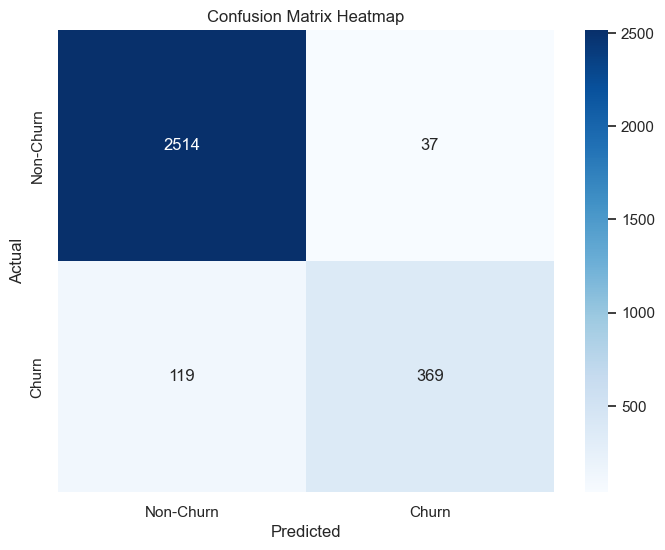

In [23]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Churn', 'Churn'], 
            yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Analysis Of Model Performance

1. **Classification Report:**

   - **Class 0 (Non-Churned)**:
     - **Precision**: 0.95 - 95% of predicted non-churned customers are correct.
     - **Recall**: 0.99 - 99% of actual non-churned customers are correctly identified.
     - **F1-Score**: 0.97 - High performance for classifying non-churned customers.
     - **Support**: 2551 - Number of actual non-churned customers.

   - **Class 1 (Churned)**:
     - **Precision**: 0.91 - 91% of predicted churned customers are correct.
     - **Recall**: 0.76 - 76% of actual churned customers are correctly identified.
     - **F1-Score**: 0.83 - Good performance for classifying churned customers.
     - **Support**: 488 - Number of actual churned customers.

   - **Overall Metrics**:
     - **Accuracy**: 0.95 - 95% overall prediction accuracy.
     - **Macro Average**:
       - **Precision**: 0.93, **Recall**: 0.87, **F1-Score**: 0.90 - Averages across both classes.
     - **Weighted Average**:
       - **Precision**: 0.95, **Recall**: 0.95, **F1-Score**: 0.95 - Weighted by class support.

2. **Confusion Matrix**:
   - **True Positives (2514)**: Correctly classified non-churned customers.
   - **True Negatives (369)**: Correctly classified churned customers.
   - **False Positives (37)**: Non-churned customers incorrectly classified as churned.
   - **False Negatives (119)**: Churned customers incorrectly classified as non-churned.


**Feature Importances**

In [24]:
# Extract feature importances
model = model_pipeline.named_steps['classifier']
importances = model.feature_importances_
feature_names = num_cols.tolist() + list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols))

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the top 10 features
feature_importances.head(10)


,feature,importance
10,Total_Trans_Amt,0.179876
11,Total_Trans_Ct,0.155770
12,Total_Ct_Chng_Q4_Q1,0.105289
7,Total_Revolving_Bal,0.102864
3,Total_Relationship_Count,0.070557
9,Total_Amt_Chng_Q4_Q1,0.061832
13,Avg_Utilization_Ratio,0.060672
6,Credit_Limit,0.036228
8,Avg_Open_To_Buy,0.032807
0,Customer_Age,0.030149


**Visualization Of Feature Importances**

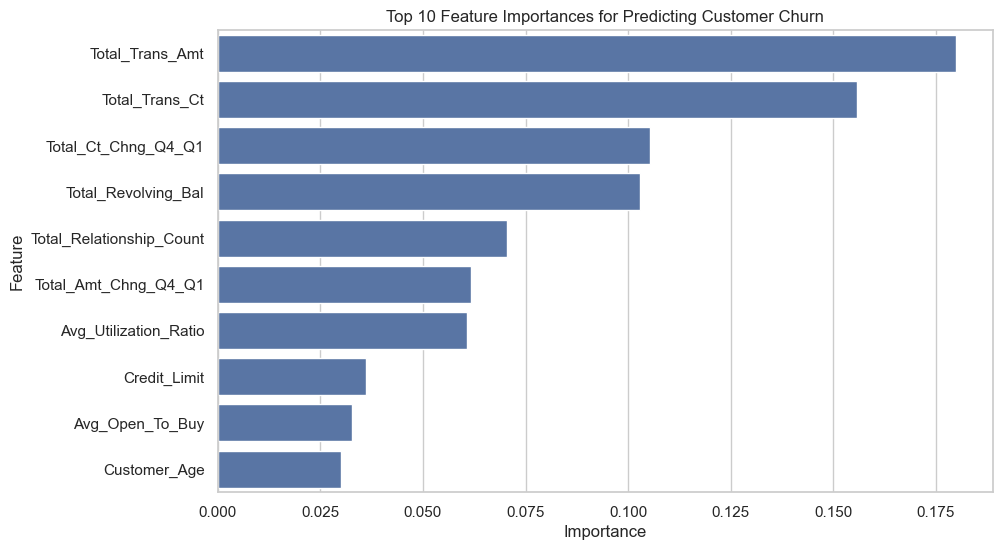

In [25]:
# Visualize the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances for Predicting Customer Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Conclusion

Based on the Random Forest Classifier analysis, we identified the top predictors of customer churn and evaluated the model's performance. Here is a summary:

#### Model Performance:
- **Accuracy**: 95% - The model correctly predicts customer churn 95% of the time.
- **Precision (Non-Churned)**: 95% - 95% of predicted non-churned customers are correct.
- **Recall (Non-Churned)**: 99% - 99% of actual non-churned customers are correctly identified.
- **F1-Score (Non-Churned)**: 97% - High performance for classifying non-churned customers.
- **Precision (Churned)**: 91% - 91% of predicted churned customers are correct.
- **Recall (Churned)**: 76% - 76% of actual churned customers are correctly identified.
- **F1-Score (Churned)**: 83% - Good performance for classifying churned customers.

#### Key Predictors for Customer Churn:
1. **Total Transaction Amount**: Higher amounts correlate with lower churn.
2. **Total Transaction Count**: More transactions correlate with lower churn.
3. **Change in Transaction Count (Q4 to Q1)**: Significant changes can indicate churn.
4. **Total Revolving Balance**: Higher balances may indicate higher churn risk.
5. **Total Relationship Count**: More relationships with the bank correlate with lower churn.
6. **Change in Transaction Amount (Q4 to Q1)**: Changes can signal churn.
7. **Average Utilization Ratio**: Indicates financial health, impacting churn.
8. **Credit Limit**: Higher limits correlate with lower churn.
9. **Average Open to Buy**: Available credit also impacts churn likelihood.
10. **Customer Age**: Older customers tend to churn less, although this factor's impact is less pronounced compared to financial metrics.

### Summary:
Transactional behavior and financial metrics are the most important predictors of customer churn. By focusing on these factors, we can better understand and mitigate churn risk, leading to more effective customer retention strategies.

#### **This comprehensive analysis, combining descriptive, exploratory, inferential, and predictive techniques, helps the bank understand the drivers of churn. By focusing on key behavioral metrics, the bank can implement data-driven strategies to reduce churn and enhance customer retention.**